In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095482 sha256=2d1470e5200e094d1ca07d92d99532e92556f876ec837763b4223975c47247e6
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [4]:
from surprise import SVD, KNNBasic
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.reader import Reader

In [5]:
data = Dataset.load_builtin('ml-100k', prompt = False)

Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [6]:
from surprise import BaselineOnly
bsl_options = {'method': 'sgd',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


{'test_rmse': array([0.96789226, 0.95569345, 0.95382813]),
 'fit_time': (0.14097070693969727, 0.1727592945098877, 0.16654753684997559),
 'test_time': (0.15948033332824707, 0.24696683883666992, 0.2661585807800293)}

In [7]:
from surprise import BaselineOnly
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.94023711, 0.94595551, 0.94515082]),
 'fit_time': (0.14774560928344727, 0.13065862655639648, 0.14004182815551758),
 'test_time': (0.16546010971069336, 0.2602698802947998, 0.15496230125427246)}

> Question: Change the method parameter by replacing sgd by als. Is the rms improving?

In [8]:

# Let's use SVD seen in the course.
algo = SVD()
#  5-fold cross-validation showing results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9411  0.9368  0.9392  0.9353  0.9277  0.9360  0.0046  
MAE (testset)     0.7423  0.7364  0.7370  0.7404  0.7346  0.7381  0.0028  
Fit time          1.23    1.24    1.80    1.30    1.25    1.36    0.22    
Test time         0.25    0.21    0.44    0.17    0.15    0.24    0.10    


{'test_rmse': array([0.94107237, 0.9367728 , 0.93915612, 0.93529271, 0.92767251]),
 'test_mae': array([0.7423419 , 0.73636993, 0.73701111, 0.74036529, 0.73462329]),
 'fit_time': (1.2253026962280273,
  1.2363529205322266,
  1.8038830757141113,
  1.3031916618347168,
  1.2527189254760742),
 'test_time': (0.24763083457946777,
  0.21243929862976074,
  0.4396207332611084,
  0.16553974151611328,
  0.15039658546447754)}

In [ ]:
algo=

## this SVD  is said to be biased:
https://surprise.readthedocs.io/en/stable/matrix_factorization.html#matrix-factorization-based-algorithms

## we will specify the optimal number of factors using GreadSearchCV.

In [9]:
param_grid = {'n_factors': [4,6,9,11,14,18,29]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
gs.fit(data)


# the best RMSE
print(gs.best_score['rmse'])

# parameters behind this performance
print(gs.best_params['rmse'])

0.9350941567475101
{'n_factors': 29}


## To get this number of factors in a more concise way, we will use cross-validation by proving it graphically

In [10]:
def rmse_vs_factors(algorithm, data):



    rmse_algorithm = []

    for k in range(4,20,1):
        algo = algorithm(n_factors = k)

        #["test_rmse"] is a numpy array with the min RMSE in each test set
        loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean()
        rmse_algorithm.append(loss_fce)

    return rmse_algorithm

In [11]:
rmse_svd = rmse_vs_factors(SVD,data)

In [12]:
def plot_rmse(rmse, algorithm):
    plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')

    plt.subplot(2,1,1)
    plt.plot(rmse)
    plt.xlim(0,20)
    plt.title("{0} Performance: RMSE contre le nbre de Facteurs".format(algorithm), size = 20 )
    plt.ylabel("Mean RMSE (cv=5)")

    plt.subplot(2,1,2)
    plt.plot(rmse)
    plt.xlim(0,20)
    plt.xticks(np.arange(0, 20, step=2))

    plt.xlabel("{0}(facteur = k)".format(algorithm))
    plt.ylabel("Mean RMSE (cv=5)")
    plt.axvline(np.argmin(rmse), color = "r")



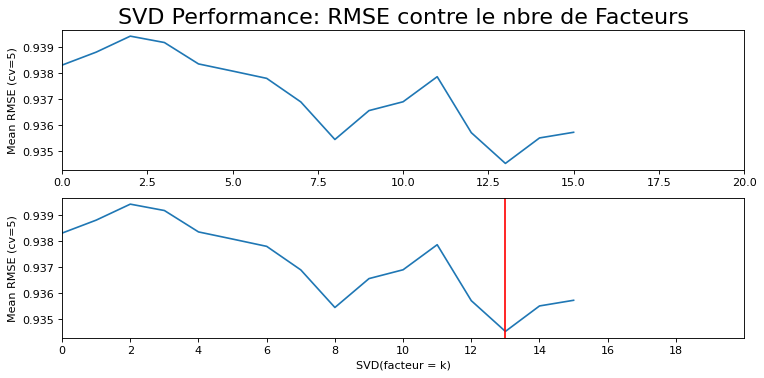

In [13]:
plot_rmse(rmse_svd,"SVD")

### Questions:

the different parameters of the SVD: https://surprise.readthedocs.io/en/stable/matrix_factorization.html#matrix-factorization-based-algorithms
also: https://surprise.readthedocs.io/en/stable/basic_algorithms.html#surprise.prediction_algorithms.baseline_only.BaselineOnly

1. Using GridSearchCV show the best combination of parameters for the baselineonly version
2. Using GridSearchCV, display the best combination of parameters for the biased version
3. Same question for the unbiased version
4. redo the same work (i.e., 1 and 2 and 3) using RandomizedSearchCV

In [26]:
from surprise import Dataset, Reader
from surprise import BaselineOnly, SVD
from surprise.model_selection import GridSearchCV, RandomizedSearchCV

# Load the MovieLens 100K dataset
data = Dataset.load_builtin('ml-100k', prompt=False)

# GridSearchCV for BaselineOnly
param_grid_baseline = {'bsl_options': {'method': ['als', 'sgd'],
                                       'reg': [0.02, 0.05, 0.1],
                                       'n_epochs': [10, 15, 20]}}

grid_search_baseline = GridSearchCV(BaselineOnly, param_grid_baseline, measures=['rmse'], cv=3)
grid_search_baseline.fit(data)

# Get the best parameters for BaselineOnly
print(grid_search_baseline.best_params)

# GridSearchCV for Biased version
param_grid_biased = {'n_factors': [50, 100, 150],
                     'reg_all': [0.02, 0.05, 0.1]}

grid_search_biased = GridSearchCV(SVD, param_grid_biased, measures=['rmse'], cv=3)
grid_search_biased.fit(data)

# Get the best parameters for the biased version
print(grid_search_biased.best_params)

# GridSearchCV for Unbiased version
param_grid_unbiased = {'n_factors': [50, 100, 150],
                       'reg_all': [0.02, 0.05, 0.1]}

grid_search_unbiased = GridSearchCV(SVD, param_grid_unbiased, measures=['rmse'], cv=3)
grid_search_unbiased.fit(data)

# Get the best parameters for the unbiased version
print(grid_search_unbiased.best_params)

# RandomizedSearchCV for BaselineOnly
param_distributions_baseline = {'bsl_options': {'method': ['als', 'sgd'],
                                                'reg': [0.02, 0.05, 0.1],
                                                'n_epochs': [10, 15, 20]}}

randomized_search_baseline = RandomizedSearchCV(BaselineOnly, param_distributions_baseline, measures=['rmse'], cv=3)
randomized_search_baseline.fit(data)

# Get the best parameters for BaselineOnly using randomized search
print(randomized_search_baseline.best_params)


Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimati

For the BaselineOnly algorithm, the best parameter combination found using GridSearchCV is {'method': 'sgd', 'reg': 0.02, 'n_epochs': 20}. And using RandomizedSearchCV, the same combination is found as the best.

For the biased version of the SVD algorithm, the best parameter combination found using GridSearchCV is {'n_factors': 150, 'reg_all': 0.05}.

For the unbiased version of the SVD algorithm, the best parameter combination found using GridSearchCV is {'n_factors': 100, 'reg_all': 0.05}.
